In [1]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

Задача 1

Примените алгоритм Metropolis для генерации выборки из распределения с плотностью p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

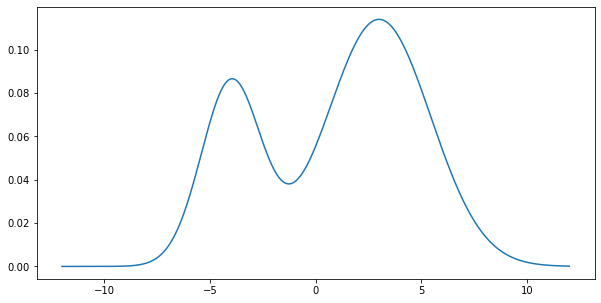

In [3]:
from scipy.stats import norm

x = np.linspace(-12, 12, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

fig, ax = plt.subplots(1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(x, y)
plt.show()

In [5]:
def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)

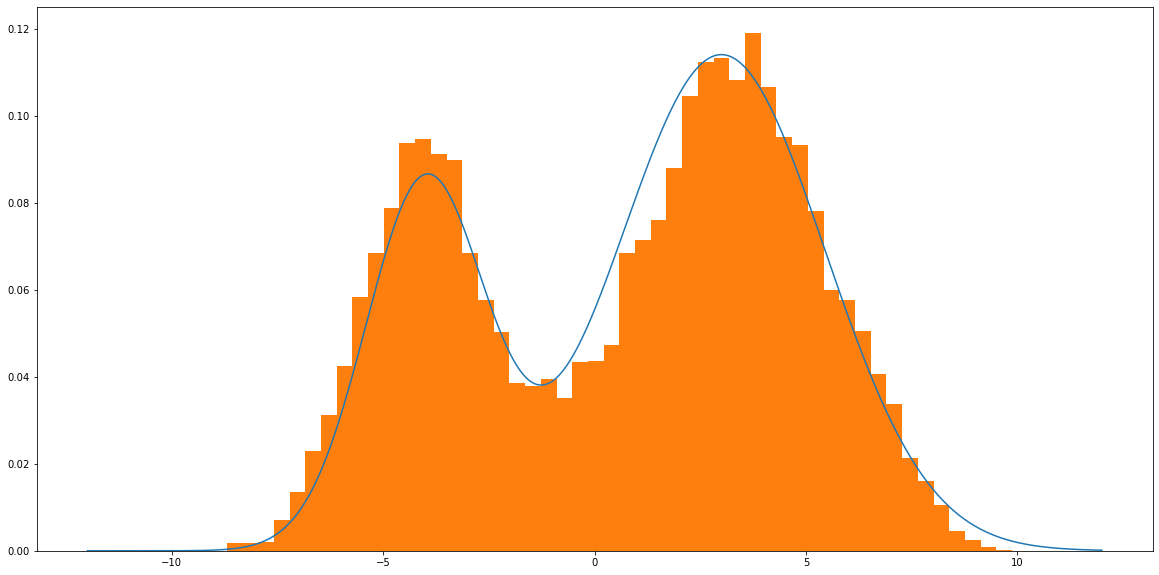

In [10]:
def val(theta, **kwargs):
    return 0.3 * norm(-4, np.sqrt(2)).pdf(theta) + 0.7 * norm(3, np.sqrt(6)).pdf(theta)

post = metroplis(-0.5, val, proposal, 20000, sigma=0.5)

fig, ax = plt.subplots(1, figsize=(20, 10))
fig.patch.set_facecolor('xkcd:white')
plt.plot(x, y)
plt.hist(post, bins=50, density=True)
plt.show()

Задача 2

Рассмотрим граф G=(V,E), вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример допустимой расстановки значений по вершинам графа показан на картинке ниже (черные вершины имеют значение 1, белые - 0):

Как оценить, сколько в среднем закрашенных вершин будет иметь такой граф?

Сформулируем задачу в математических терминах.

Пусть ξ∈{0,1}V обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть ZG - общее количество допустимых конфигураций. Зададим распределение на множестве всех 2V конфигураций:
μ(ξ)={1ZG,0,ξ - допустимая конфигурацияиначе.
Обозначим n(ξ) - число закрашенных вершин в конфигурации ξ. Тогда
En(ξ)=∑x∈{0,1}Vn(x)μ(x)=1ZG∑x∈{0,1}Vn(x)I{x−допустимая}

Явно перебирать все x∈{0,1}V не представляется возможным. Мы могли бы попробовать оценить En(ξ), используя закон больших чиcел:
En(ξ)≈1N∑i=1Nn(ξi),где ξi, i=1,...,N - выборка случайных допустимых графов. 

Для моделирования выборки можно применить метод MCMC:

    выбираем случайную вершину
    если в вершине можно заменить цвет - заменяем с вероятностью 0.5
    добавляем граф в выборку
    переходим на шаг 1

Задание

    Оценить En(ξ) для графа 10х10
    Построить график распределеиня n(ξ)

Совет: проверьте алгоритм на графах размера 2×2. Ваш ответ должет быть близок к точному ответу (0+1+1+1+1+2+2)/7 = 8/7.


In [11]:
def check(graph, n):
    if graph[n[0], n[1]] == 1:
        return True
    else:
        rows, cols = range(10), range(10)
        offsets = [[-1,0],[0,-1],[0,1],[1,0]]
        
        for i in offsets:
            
            ny = n[1]+i[0]
            nx = n[0]+i[1]
            if ny in rows and nx in cols:
                if graph[nx, ny]==1:
                    #print("!!!")
                    return False
        return True 
    
    
    
graphs=[]
graphs.append(np.zeros((10, 10)))

i = 0
while i < 50000:
    graph=np.zeros((10,10))
    n=np.random.randint(10, size=2)
    #print(n)
    if check(graphs[-1], n)==True and np.random.rand()>0.5:
        if graphs[-1][n[0], n[1]]==1:
            
            graph[n[0], n[1]] = -1
        else:
            graph[n[0], n[1]] = 1
        graphs.append(graphs[-1]+graph)
        i+=1
graphs, len(graphs)

([array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
  array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.,

In [15]:
n_ = []
for i in graphs:
    n_.append(np.sum(i))
m = np.asarray(n_).mean()
m

23.45585088298234

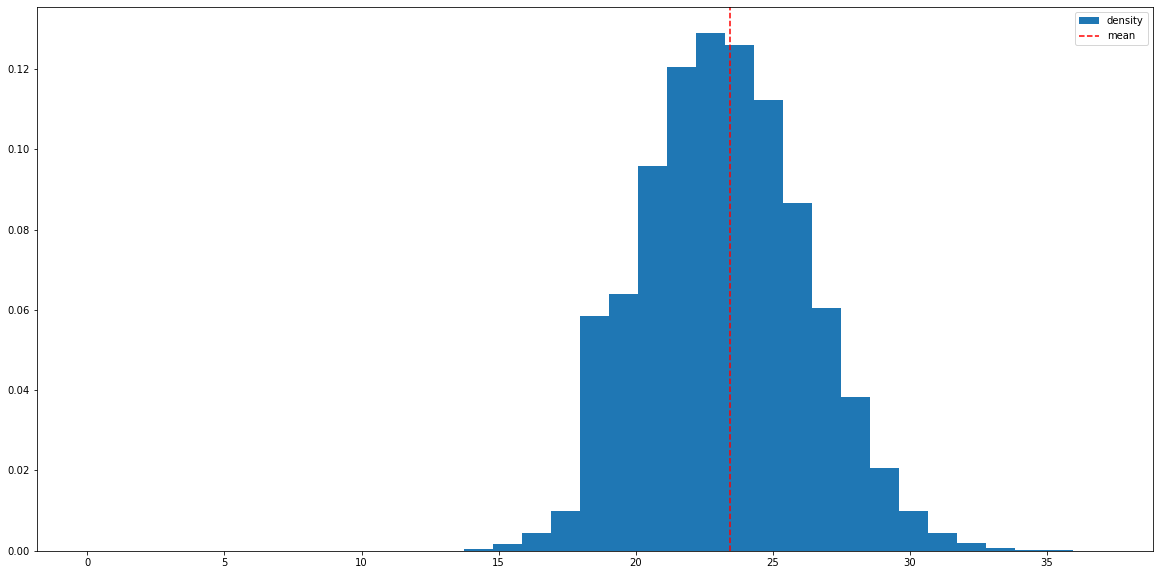

In [16]:
fig, ax = plt.subplots(1, figsize=(20, 10))
fig.patch.set_facecolor('xkcd:white')
plt.hist(n_, bins=35, density=True, label="density")
plt.axvline(x=m, color='red', linestyle='--', label='mean')
plt.legend()
plt.show()